In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [4]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\PCOS PREDICTION\pcos_prediction_dataset.csv")

In [6]:
df.shape

(120000, 17)

In [7]:
df.head()

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No


In [8]:
df.tail()

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
119995,Guinea,28,Normal,Regular,No,Moderate,Yes,No,3,Low,Urban,Middle,Yes,Yes,0.090663,African,No
119996,Mozambique,35,Overweight,Regular,No,NaN,No,No,5,Low,Rural,High,Yes,Yes,0.167482,Asian,No
119997,Cambodia,16,Normal,Regular,No,Moderate,No,No,9,Medium,Rural,Low,Yes,Yes,0.236241,African,Yes
119998,Benin,15,Obese,Regular,Yes,NaN,Yes,Yes,1,Medium,Rural,High,No,No,0.119993,Hispanic,No
119999,Brazil,17,Obese,Irregular,Yes,NaN,No,No,6,Medium,Rural,Low,Yes,No,0.223073,Asian,No


In [9]:
df[df["Diagnosis"]=="Yes"].head(20)

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
8,United States,47,Normal,Regular,Yes,NaN,Yes,No,1,Medium,Urban,Low,Yes,No,0.103628,Asian,Yes
37,France,44,Overweight,Regular,No,Mild,No,No,10,Medium,Urban,Low,Yes,Yes,0.158658,African,Yes
44,Russia,37,Normal,Regular,No,NaN,Yes,No,8,Low,Urban,Middle,Yes,No,0.132992,Caucasian,Yes
68,Yemen,21,Normal,Irregular,Yes,Mild,No,Yes,10,Low,Urban,Middle,Yes,Yes,0.242853,African,Yes
77,Afghanistan,32,Normal,Regular,No,Moderate,Yes,No,5,Low,Rural,High,Yes,No,0.212097,African,Yes
102,South Africa,37,Overweight,Irregular,Yes,Mild,No,Yes,6,Medium,Urban,High,No,No,0.166159,Hispanic,Yes
106,Iraq,47,Normal,Regular,Yes,NaN,Yes,Yes,1,Medium,Urban,High,Yes,No,0.056577,Asian,Yes
150,Cambodia,25,Obese,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,Yes,No,0.082569,Other,Yes


In [10]:
df.columns

Index(['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History of PCOS', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns',
       'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')

In [11]:
df.dtypes

Country                         object
Age                              int64
BMI                             object
Menstrual Regularity            object
Hirsutism                       object
Acne Severity                   object
Family History of PCOS          object
Insulin Resistance              object
Lifestyle Score                  int64
Stress Levels                   object
Urban/Rural                     object
Socioeconomic Status            object
Awareness of PCOS               object
Fertility Concerns              object
Undiagnosed PCOS Likelihood    float64
Ethnicity                       object
Diagnosis                       object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [13]:
df.describe()

,Age,Lifestyle Score,Undiagnosed PCOS Likelihood
count,120000.000000,120000.000000,120000.000000
mean,31.980508,5.506567,0.149937
std,10.096799,2.871052,0.057786
min,15.000000,1.000000,0.050001
25%,23.000000,3.000000,0.099820
50%,32.000000,6.000000,0.149844
75%,41.000000,8.000000,0.200061
max,49.000000,10.000000,0.249998


In [14]:
df.describe(exclude='number')

,Country,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Ethnicity,Diagnosis
count,120000,120000,120000,120000,59915,120000,120000,120000,120000,120000,120000,120000,120000,120000
unique,77,4,2,2,3,2,2,3,2,3,2,2,5,2
top,Burkina Faso,Normal,Regular,No,Mild,No,No,Medium,Urban,Middle,Yes,No,African,No
freq,1667,60080,83941,72039,35822,84028,90183,59959,83943,59860,71891,72205,24285,107405


In [15]:
df.isnull().sum()

Country                            0
Age                                0
BMI                                0
Menstrual Regularity               0
Hirsutism                          0
Acne Severity                  60085
Family History of PCOS             0
Insulin Resistance                 0
Lifestyle Score                    0
Stress Levels                      0
Urban/Rural                        0
Socioeconomic Status               0
Awareness of PCOS                  0
Fertility Concerns                 0
Undiagnosed PCOS Likelihood        0
Ethnicity                          0
Diagnosis                          0
dtype: int64

In [16]:
df["Acne Severity"].value_counts()

Acne Severity
Mild        35822
Moderate    18072
Severe       6021
Name: count, dtype: int64

In [17]:
df['Acne Severity'].fillna('No Acne', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27412\1928672187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Acne Severity'].fillna('No Acne', inplace=True)


In [18]:
df["Acne Severity"].value_counts()

Acne Severity
No Acne     60085
Mild        35822
Moderate    18072
Severe       6021
Name: count, dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [21]:
numerical_columns

Index(['Age', 'Lifestyle Score', 'Undiagnosed PCOS Likelihood'], dtype='object')

In [22]:
categorical_columns

Index(['Country', 'BMI', 'Menstrual Regularity', 'Hirsutism', 'Acne Severity',
       'Family History of PCOS', 'Insulin Resistance', 'Stress Levels',
       'Urban/Rural', 'Socioeconomic Status', 'Awareness of PCOS',
       'Fertility Concerns', 'Ethnicity', 'Diagnosis'],
      dtype='object')

Country
Burkina Faso    1667
Malawi          1632
Ghana           1629
Vietnam         1626
South Korea     1626
                ... 
Netherlands     1500
Algeria         1496
Uganda          1487
Zambia          1479
Cambodia        1441
Name: count, Length: 77, dtype: int64


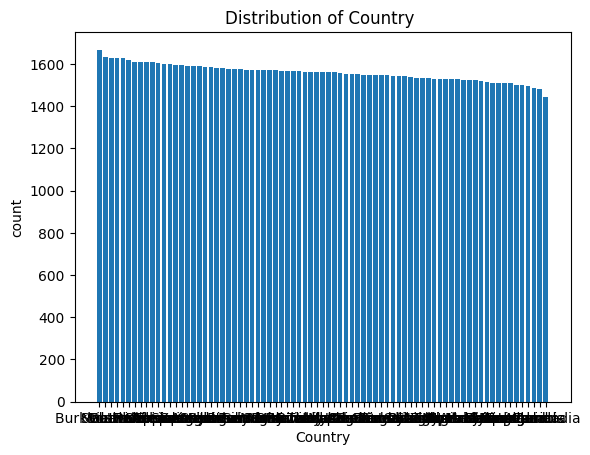

BMI
Normal         60080
Overweight     36038
Obese          17945
Underweight     5937
Name: count, dtype: int64


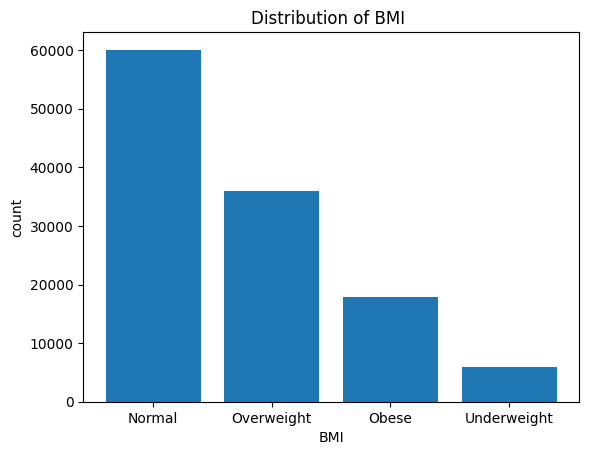

Menstrual Regularity
Regular      83941
Irregular    36059
Name: count, dtype: int64


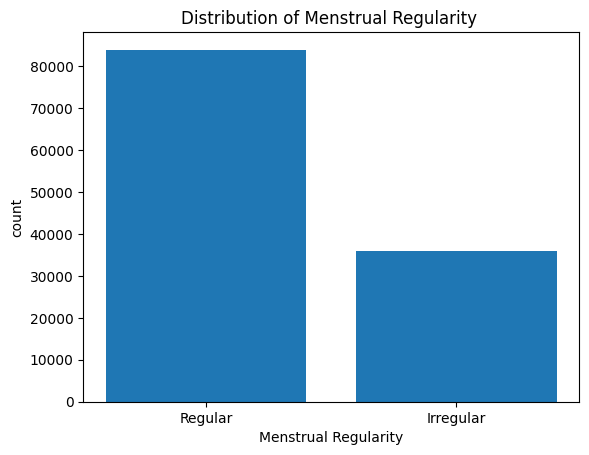

Hirsutism
No     72039
Yes    47961
Name: count, dtype: int64


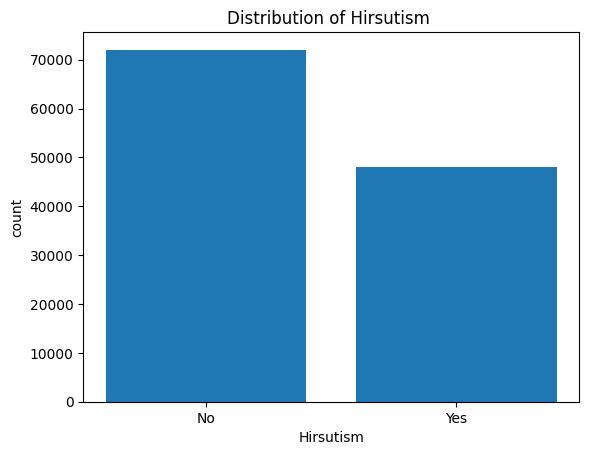

Acne Severity
No Acne     60085
Mild        35822
Moderate    18072
Severe       6021
Name: count, dtype: int64


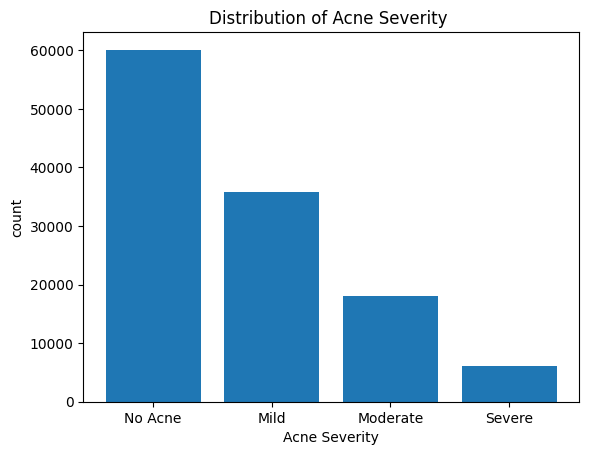

Family History of PCOS
No     84028
Yes    35972
Name: count, dtype: int64


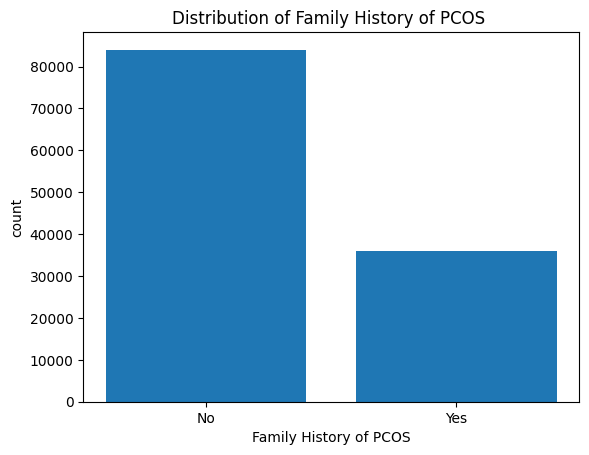

Insulin Resistance
No     90183
Yes    29817
Name: count, dtype: int64


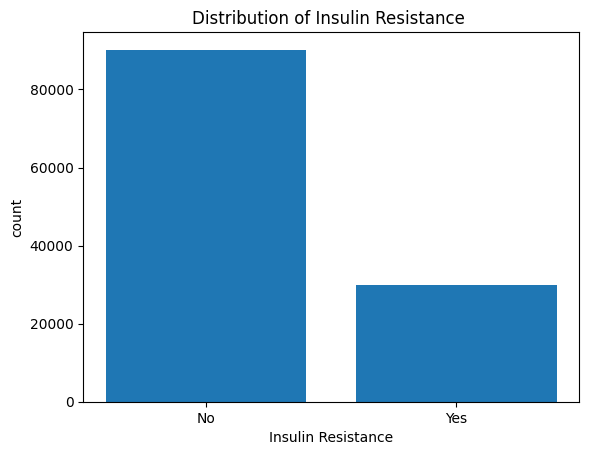

Stress Levels
Medium    59959
Low       36118
High      23923
Name: count, dtype: int64


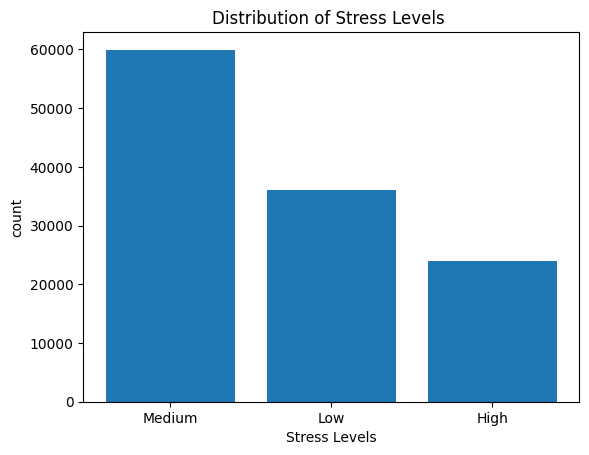

Urban/Rural
Urban    83943
Rural    36057
Name: count, dtype: int64


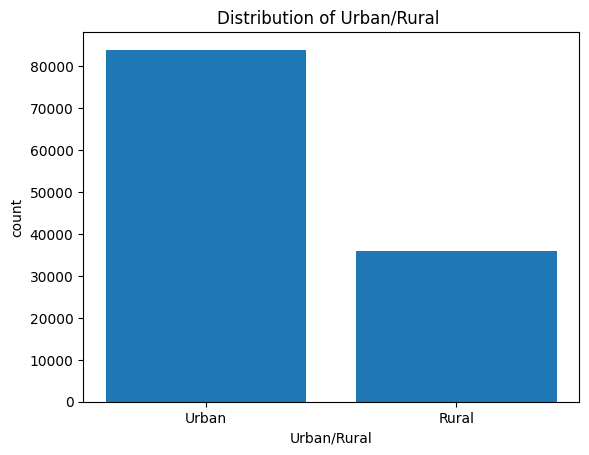

Socioeconomic Status
Middle    59860
Low       35954
High      24186
Name: count, dtype: int64


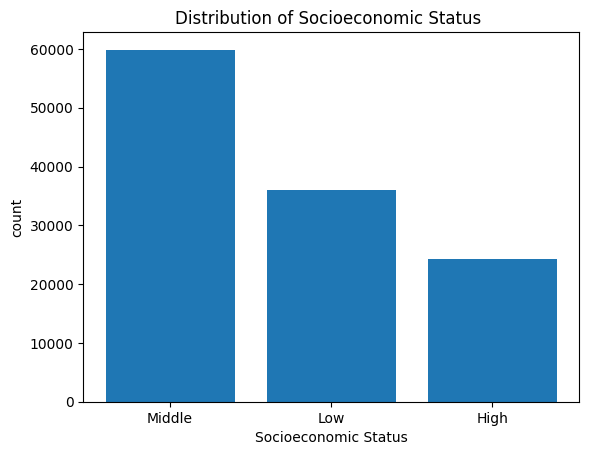

Awareness of PCOS
Yes    71891
No     48109
Name: count, dtype: int64


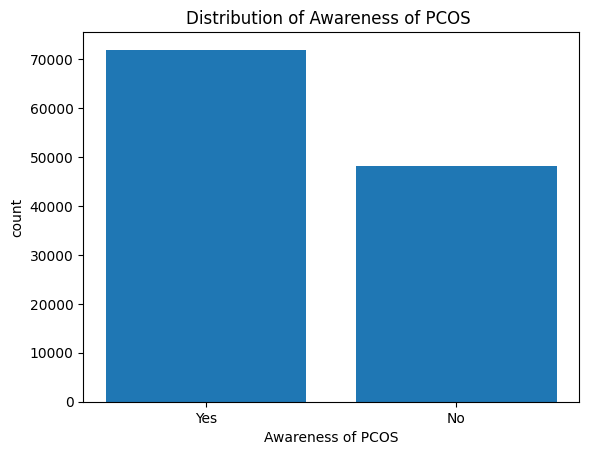

Fertility Concerns
No     72205
Yes    47795
Name: count, dtype: int64


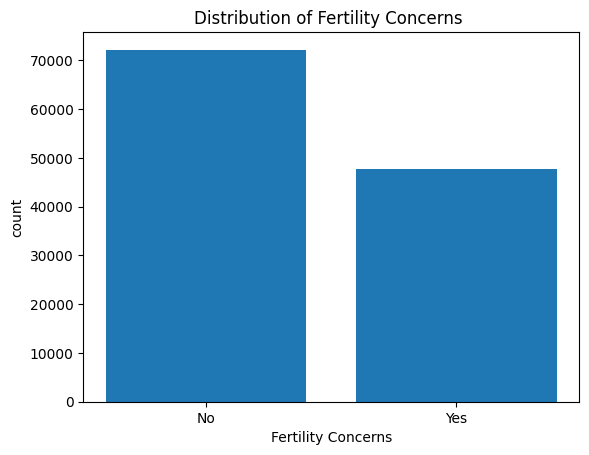

Ethnicity
African      24285
Hispanic     24241
Caucasian    23950
Other        23876
Asian        23648
Name: count, dtype: int64


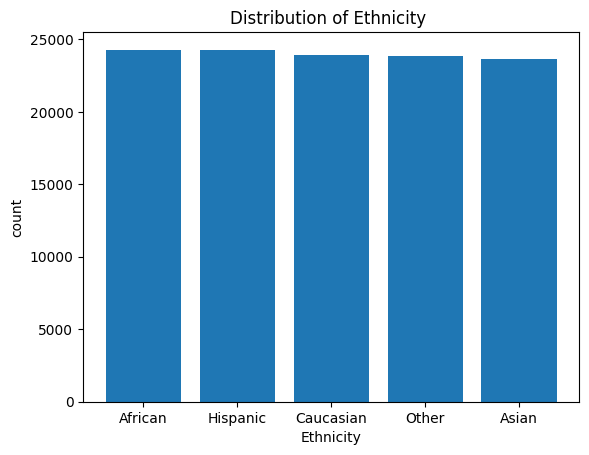

Diagnosis
No     107405
Yes     12595
Name: count, dtype: int64


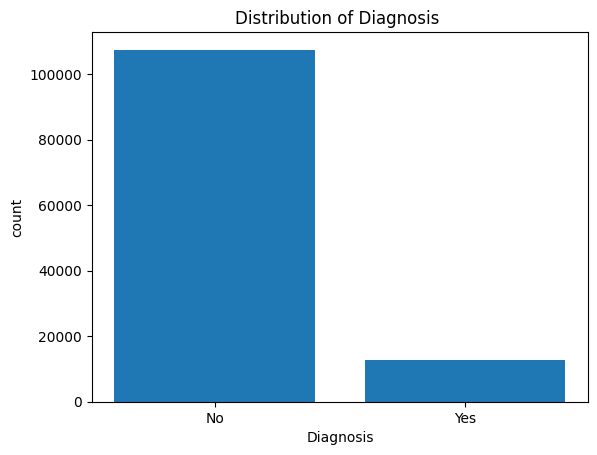

In [23]:
for col in categorical_columns:
    print(df[col].value_counts())
    plt.bar(df[col].value_counts().index,df[col].value_counts())
    plt.title(f"Distribution of {col} ")
    plt.xlabel(f"{col}")
    plt.ylabel("count")
    plt.show()

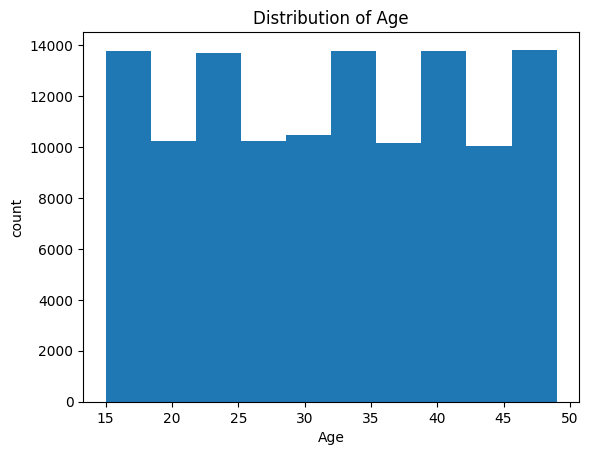

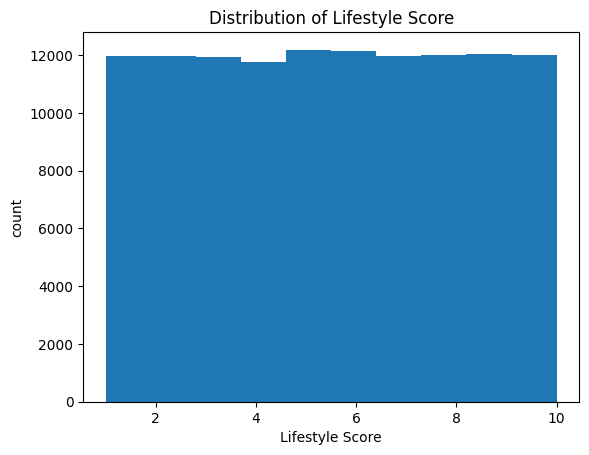

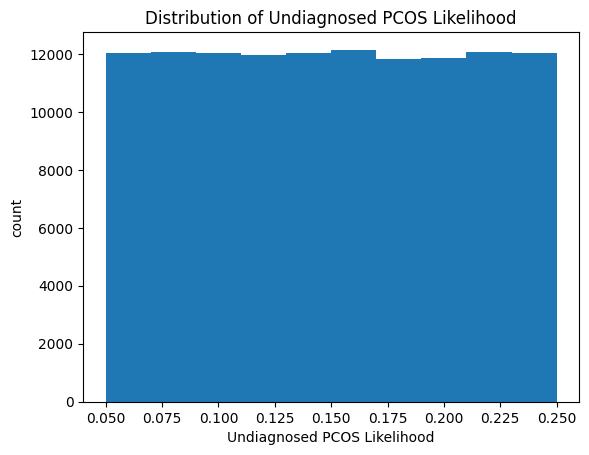

In [24]:
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("count")
    plt.show()

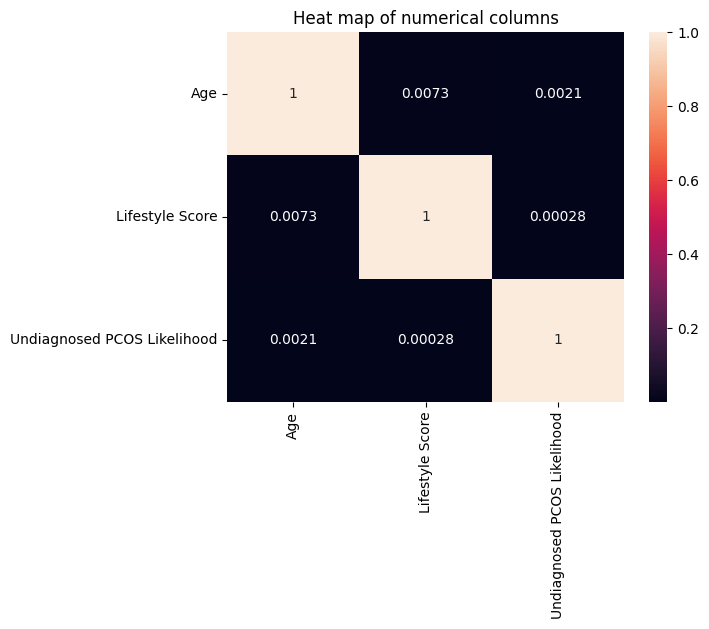

In [25]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Heat map of numerical columns")
plt.show()

In [26]:
df.columns

Index(['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History of PCOS', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns',
       'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')

BMI vs diagnosis count
----------------------------------------------
Diagnosis       No   Yes
BMI                     
Normal       53788  6292
Obese        16079  1866
Overweight   32273  3765
Underweight   5265   672
----------------------------------------------
BMI vs diagnosis percentage
----------------------------------------------
Diagnosis           No        Yes
BMI                              
Normal       89.527297  10.472703
Obese        89.601560  10.398440
Overweight   89.552694  10.447306
Underweight  88.681152  11.318848


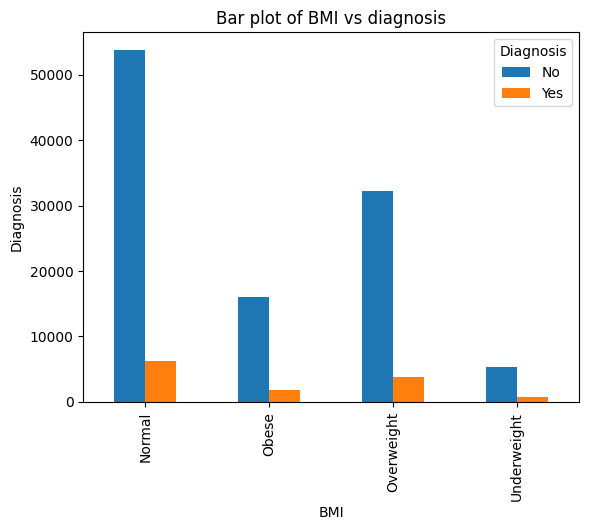

Menstrual Regularity vs diagnosis count
----------------------------------------------
Diagnosis                No   Yes
Menstrual Regularity             
Irregular             32236  3823
Regular               75169  8772
----------------------------------------------
Menstrual Regularity vs diagnosis percentage
----------------------------------------------
Diagnosis                    No        Yes
Menstrual Regularity                      
Irregular             89.397931  10.602069
Regular               89.549803  10.450197


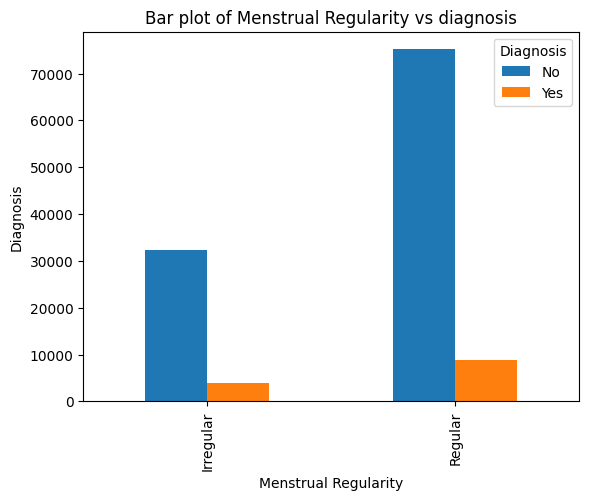

Hirsutism vs diagnosis count
----------------------------------------------
Diagnosis     No   Yes
Hirsutism             
No         64498  7541
Yes        42907  5054
----------------------------------------------
Hirsutism vs diagnosis percentage
----------------------------------------------
Diagnosis         No        Yes
Hirsutism                      
No         89.532059  10.467941
Yes        89.462271  10.537729


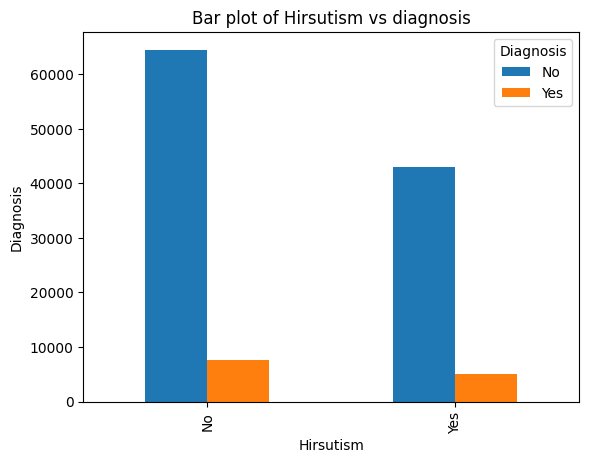

Acne Severity vs diagnosis count
----------------------------------------------
Diagnosis         No   Yes
Acne Severity             
Mild           32064  3758
Moderate       16169  1903
No Acne        53777  6308
Severe          5395   626
----------------------------------------------
Acne Severity vs diagnosis percentage
----------------------------------------------
Diagnosis             No        Yes
Acne Severity                      
Mild           89.509240  10.490760
Moderate       89.469898  10.530102
No Acne        89.501539  10.498461
Severe         89.603056  10.396944


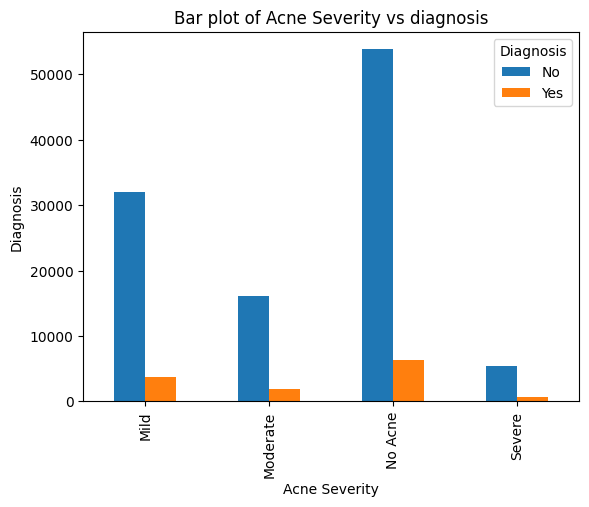

Family History of PCOS vs diagnosis count
----------------------------------------------
Diagnosis                  No   Yes
Family History of PCOS             
No                      75174  8854
Yes                     32231  3741
----------------------------------------------
Family History of PCOS vs diagnosis percentage
----------------------------------------------
Diagnosis                      No        Yes
Family History of PCOS                      
No                      89.463036  10.536964
Yes                     89.600245  10.399755


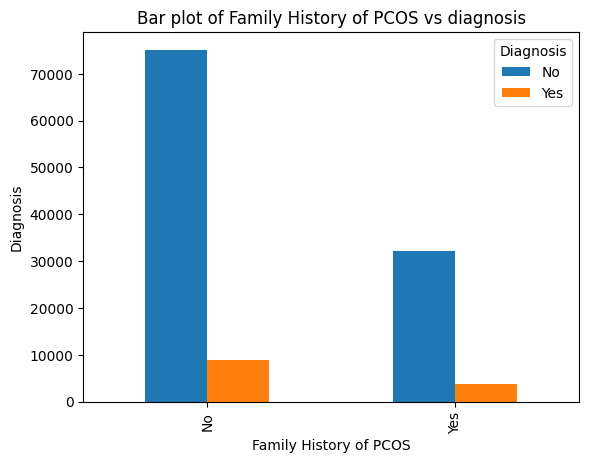

Insulin Resistance vs diagnosis count
----------------------------------------------
Diagnosis              No   Yes
Insulin Resistance             
No                  80773  9410
Yes                 26632  3185
----------------------------------------------
Insulin Resistance vs diagnosis percentage
----------------------------------------------
Diagnosis                  No        Yes
Insulin Resistance                      
No                  89.565661  10.434339
Yes                 89.318174  10.681826


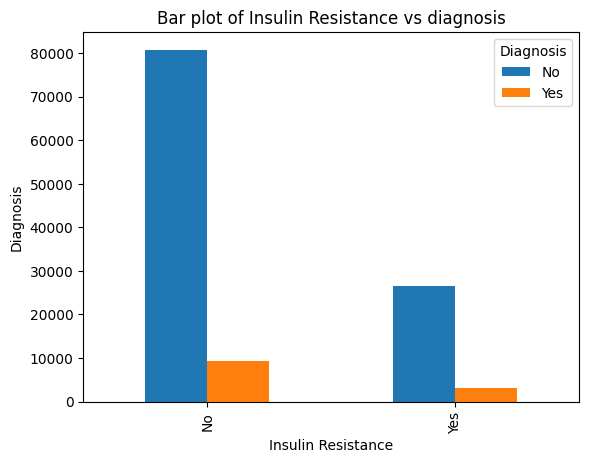

Stress Levels vs diagnosis count
----------------------------------------------
Diagnosis         No   Yes
Stress Levels             
High           21426  2497
Low            32305  3813
Medium         53674  6285
----------------------------------------------
Stress Levels vs diagnosis percentage
----------------------------------------------
Diagnosis             No        Yes
Stress Levels                      
High           89.562346  10.437654
Low            89.442937  10.557063
Medium         89.517837  10.482163


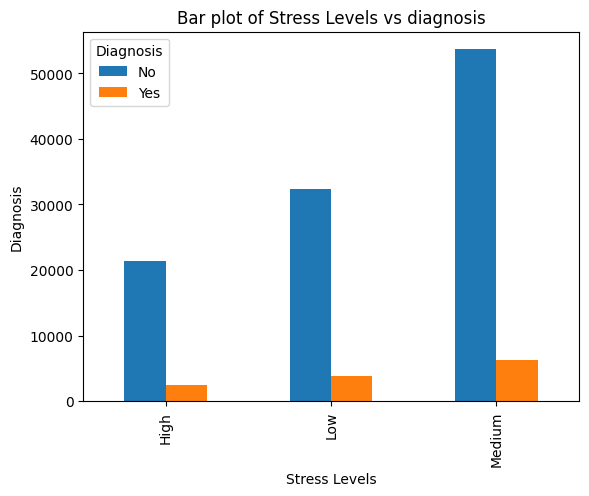

Urban/Rural vs diagnosis count
----------------------------------------------
Diagnosis       No   Yes
Urban/Rural             
Rural        32296  3761
Urban        75109  8834
----------------------------------------------
Urban/Rural vs diagnosis percentage
----------------------------------------------
Diagnosis           No        Yes
Urban/Rural                      
Rural        89.569293  10.430707
Urban        89.476192  10.523808


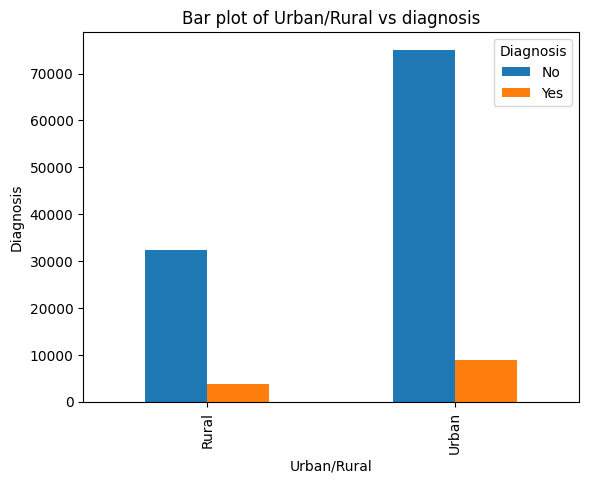

Socioeconomic Status vs diagnosis count
----------------------------------------------
Diagnosis                No   Yes
Socioeconomic Status             
High                  21737  2449
Low                   32229  3725
Middle                53439  6421
----------------------------------------------
Socioeconomic Status vs diagnosis percentage
----------------------------------------------
Diagnosis                    No        Yes
Socioeconomic Status                      
High                  89.874307  10.125693
Low                   89.639539  10.360461
Middle                89.273304  10.726696


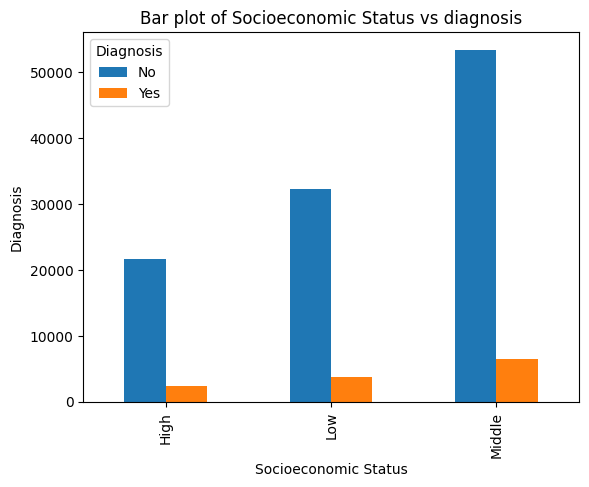

Awareness of PCOS vs diagnosis count
----------------------------------------------
Diagnosis             No   Yes
Awareness of PCOS             
No                 43003  5106
Yes                64402  7489
----------------------------------------------
Awareness of PCOS vs diagnosis percentage
----------------------------------------------
Diagnosis                 No        Yes
Awareness of PCOS                      
No                 89.386601  10.613399
Yes                89.582841  10.417159


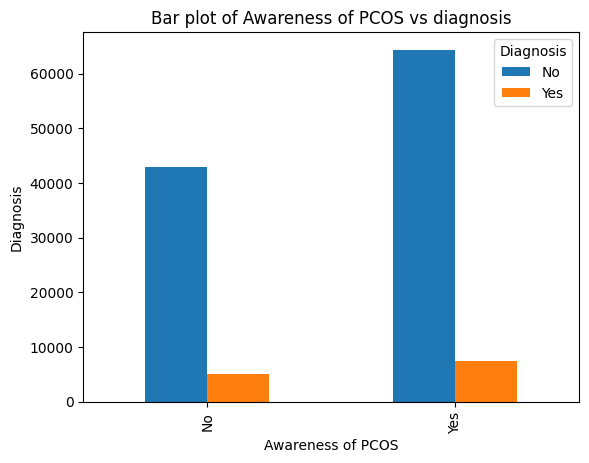

Fertility Concerns vs diagnosis count
----------------------------------------------
Diagnosis              No   Yes
Fertility Concerns             
No                  64568  7637
Yes                 42837  4958
----------------------------------------------
Fertility Concerns vs diagnosis percentage
----------------------------------------------
Diagnosis                 No       Yes
Fertility Concerns                    
No                  89.42317  10.57683
Yes                 89.62653  10.37347


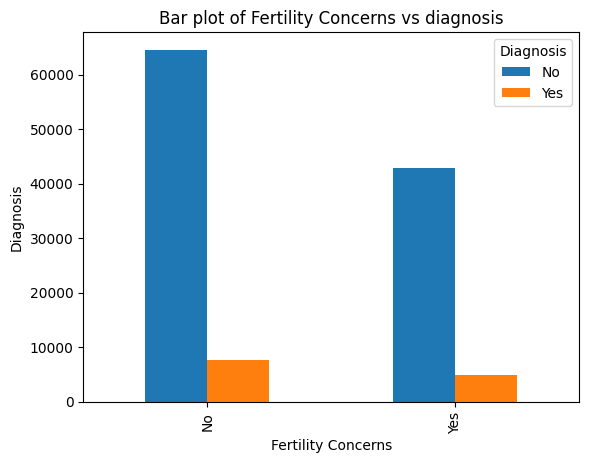

Ethnicity vs diagnosis count
----------------------------------------------
Diagnosis     No   Yes
Ethnicity             
African    21713  2572
Asian      21250  2398
Caucasian  21355  2595
Hispanic   21710  2531
Other      21377  2499
----------------------------------------------
Ethnicity vs diagnosis percentage
----------------------------------------------
Diagnosis         No        Yes
Ethnicity                      
African    89.409100  10.590900
Asian      89.859608  10.140392
Caucasian  89.164927  10.835073
Hispanic   89.559012  10.440988
Other      89.533423  10.466577


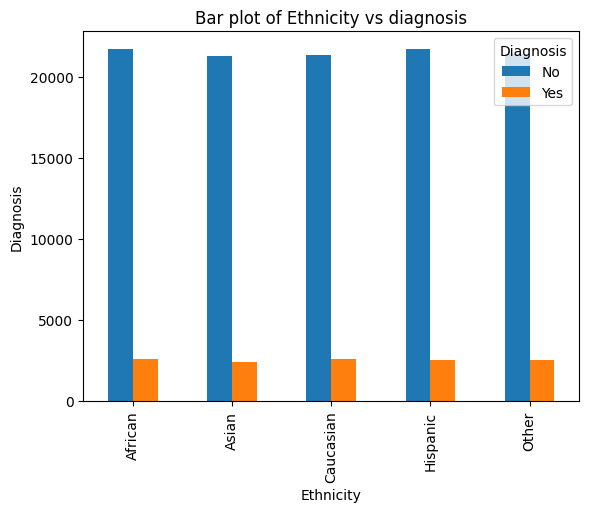

In [27]:
for col in categorical_columns:
    if col != "Country" and col != "Diagnosis":
        print(f"{col} vs diagnosis count")
        print("----------------------------------------------")
        a = df.groupby([col, "Diagnosis"]).size().unstack()
        print(a)
        print("----------------------------------------------")
        print(f"{col} vs diagnosis percentage")
        print("----------------------------------------------")
        a_percent = a.div(a.sum(axis=1), axis=0) * 100  
        print(a_percent)
        
        a.plot(kind="bar")
        plt.title(f"Bar plot of {col} vs diagnosis")
        plt.xlabel(f"{col}")
        plt.ylabel("Diagnosis")
        plt.show() 

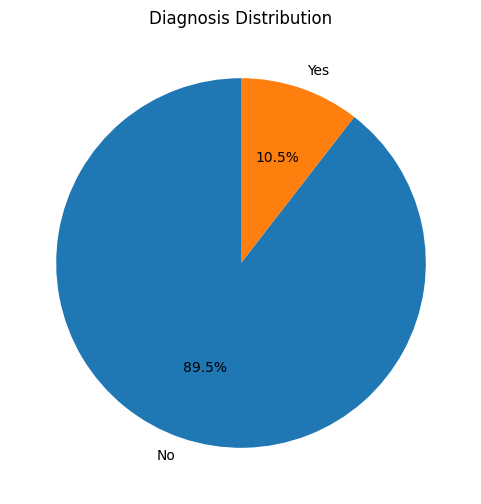

In [28]:
df['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title('Diagnosis Distribution')
plt.ylabel('')
plt.show()

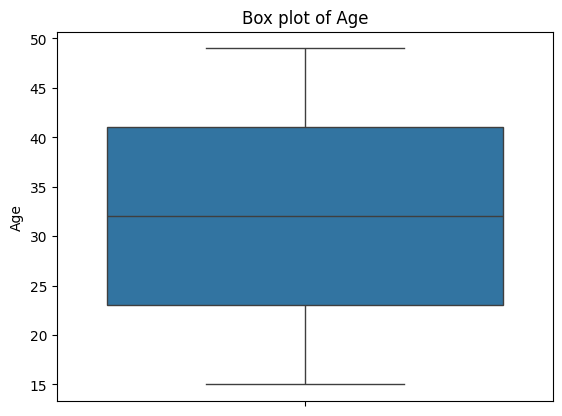

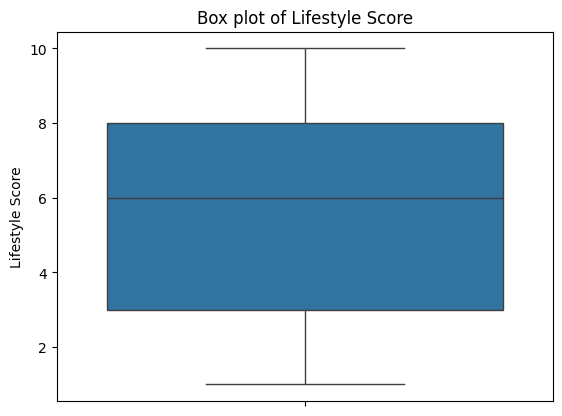

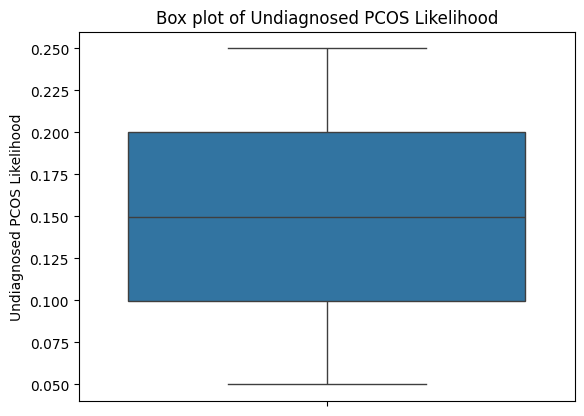

In [29]:
for col in numerical_columns:
    sns.boxplot(df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

In [30]:
df.groupby(['Menstrual Regularity', 'BMI'])[['Diagnosis']].count().sort_values(by='Menstrual Regularity', ascending=False)

Diagnosis
Menstrual Regularity BMI                   
Regular              Normal           42033
                     Obese            12489
                     Overweight       25256
                     Underweight       4163
Irregular            Normal           18047
                     Obese             5456
                     Overweight       10782
                     Underweight       1774

In [31]:
df.groupby(['Menstrual Regularity', 'Hirsutism'])[['Diagnosis']].count().sort_values(by='Menstrual Regularity', ascending=False)

Diagnosis
Menstrual Regularity Hirsutism           
Regular              No             50456
                     Yes            33485
Irregular            No             21583
                     Yes            14476

In [32]:
df.groupby(['Stress Levels','Socioeconomic Status'])[['Diagnosis']].count().sort_values(by='Stress Levels', ascending=False)

Diagnosis
Stress Levels Socioeconomic Status           
Medium        High                      12012
              Low                       18011
              Middle                    29936
Low           High                       7340
              Low                       10871
              Middle                    17907
High          High                       4834
              Low                        7072
              Middle                    12017

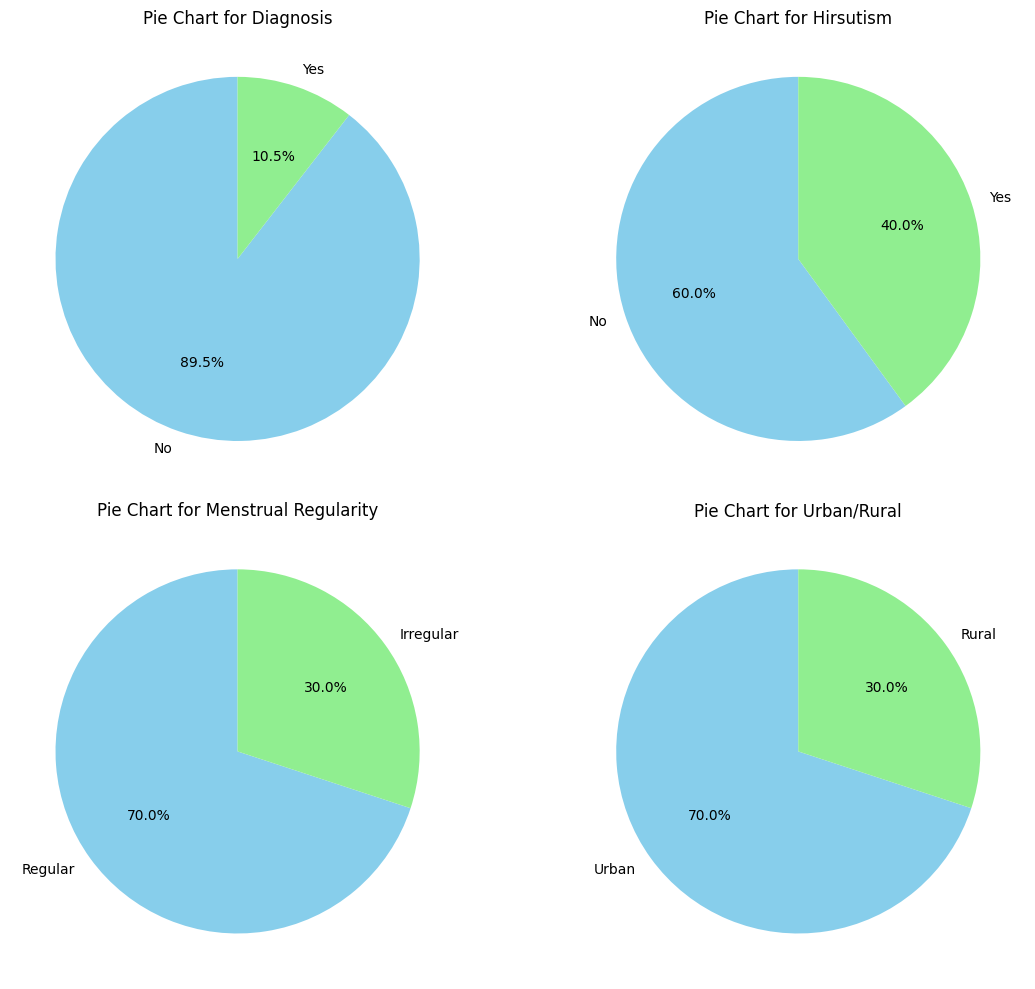

In [33]:
categorical_columns = ['Diagnosis', 'Hirsutism', 'Menstrual Regularity', 'Urban/Rural']
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i) 
    category_counts = df[col].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
    plt.title(f'Pie Chart for {col}')

plt.tight_layout()
plt.show()

In [34]:
df = df.drop(["Country", "Lifestyle Score", "Urban/Rural", "Socioeconomic Status", "Awareness of PCOS", "Undiagnosed PCOS Likelihood", "Ethnicity","Fertility Concerns"], axis=1)


In [35]:
df.columns

Index(['Age', 'BMI', 'Menstrual Regularity', 'Hirsutism', 'Acne Severity',
       'Family History of PCOS', 'Insulin Resistance', 'Stress Levels',
       'Diagnosis'],
      dtype='object')

In [36]:
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
yes_no_mapping = {'Yes': 1, 'No': 0}
severity_mapping = {'No Acne': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
bmi_mapping = {'Normal': 1, 'Underweight': 0, 'Overweight': 3, 'Obese': 4}
menstrual_regular_mapping = {'Regular': 1, 'Irregular': 0}

In [37]:
df['BMI'] = df['BMI'].replace(bmi_mapping)

df['Hirsutism'] = df['Hirsutism'].replace(yes_no_mapping)

df['Acne Severity'] = df['Acne Severity'].replace(severity_mapping)

df['Family History of PCOS'] = df['Family History of PCOS'].replace(yes_no_mapping)

df['Insulin Resistance'] = df['Insulin Resistance'].replace(yes_no_mapping)
df['Stress Levels'] = df['Stress Levels'].replace(level_mapping)
df['Diagnosis'] = df['Diagnosis'].replace(yes_no_mapping)
df["Menstrual Regularity"]=df["Menstrual Regularity"].replace(menstrual_regular_mapping)


C:\Users\HP\AppData\Local\Temp\ipykernel_27412\2094316192.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BMI'] = df['BMI'].replace(bmi_mapping)
C:\Users\HP\AppData\Local\Temp\ipykernel_27412\2094316192.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Hirsutism'] = df['Hirsutism'].replace(yes_no_mapping)
C:\Users\HP\AppData\Local\Temp\ipykernel_27412\2094316192.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

In [38]:
df

,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Stress Levels,Diagnosis
0,26,3,1,1,3,1,1,1,1
1,16,0,1,1,0,0,1,3,0
2,41,1,1,0,2,0,0,2,0
3,27,1,0,0,1,0,0,1,1
4,26,3,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
119995,28,1,1,0,2,1,0,1,0
119996,35,3,1,0,0,0,0,1,0
119997,16,1,1,0,2,0,0,2,1
119998,15,4,1,1,0,1,1,2,0


In [39]:
x = df.drop(columns=['Diagnosis'])  
y = df['Diagnosis']  

In [40]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [41]:
#from imblearn.over_sampling import RandomOverSampler
#ov=RandomOverSampler()
#x_scaled_smote,y_smote=ov.fit_resample(x_scaled,y)

In [42]:
#un=RandomUnderSampler()
#x_scaled_smote,y_smote=un.fit_resample(x_scaled,y)

In [43]:
smote=SMOTE()
x_scaled_smote,y_smote=smote.fit_resample(x_scaled,y)

In [44]:
x_scaled.shape

(120000, 8)

In [45]:
y.shape

(120000,)

In [46]:
df[df["Diagnosis"]==1]

,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Stress Levels,Diagnosis
0,26,3,1,1,3,1,1,1,1
3,27,1,0,0,1,0,0,1,1
8,47,1,1,1,0,1,0,2,1
37,44,3,1,0,1,0,0,2,1
44,37,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
119902,20,3,0,1,1,0,0,1,1
119923,31,1,1,0,1,0,0,1,1
119938,31,3,0,0,0,0,0,3,1
119973,23,1,1,0,2,0,0,1,1


In [47]:
df[df["Diagnosis"]==0]

,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Stress Levels,Diagnosis
1,16,0,1,1,0,0,1,3,0
2,41,1,1,0,2,0,0,2,0
4,26,3,0,1,0,0,0,2,0
5,17,3,0,0,0,0,1,1,0
6,39,4,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...
119994,44,1,1,1,1,0,1,2,0
119995,28,1,1,0,2,1,0,1,0
119996,35,3,1,0,0,0,0,1,0
119998,15,4,1,1,0,1,1,2,0


In [48]:
y_smote.value_counts()

Diagnosis
1    107405
0    107405
Name: count, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled_smote,y_smote,test_size=0.2,random_state=42)

In [50]:
x_test.shape

(42962, 8)

In [51]:
x_train.shape

(171848, 8)

In [52]:
y_train.shape

(171848,)

In [53]:
random=RandomForestClassifier(n_estimators=10)
gradient=GradientBoostingClassifier(learning_rate=0.001,n_estimators=1000)

In [ ]:
models=[KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier(),random,gradient]   #HERE WE MODEL THE OUTPUT AFTER SMOTE
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print(len(str(model))*"-")
  print("")
  print(f"Accuracy:{accuracy_score(y_test,y_pred)*100}%")
  print("")
  print(classification_report(y_test,y_pred))
  print("")
  print()

KNeighborsClassifier()
----------------------

Accuracy:69.1681020436665%

              precision    recall  f1-score   support

           0       0.67      0.75      0.71     21381
           1       0.72      0.63      0.67     21581

    accuracy                           0.69     42962
   macro avg       0.69      0.69      0.69     42962
weighted avg       0.69      0.69      0.69     42962





In [ ]:
for model in models:
  print(model)
  print(len(str(model))*"-")
  crsvalscore=(cross_val_score(model,x_scaled_smote,y_smote,cv=5).mean())*100
  print(f"{crsvalscore} %")
  print("")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth': [5, 10, 15, 20], 'n_estimators': [50, 100, 150]}
rand_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5,n_iter=20)
rand_search.fit(x_train, y_train)
print("Best Parameters: ", rand_search.best_params_)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
print(type(rf_model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
import pickle
with open("pcos_model.pkl", "wb") as obj:
    pickle.dump(rf_model, obj)  

In [ ]:
with open("pcos_model.pkl", "rb") as obj:
    model = pickle.load(obj)  

print(type(model)) 
def predict_pcos(features):
    prediction = model.predict([features])  
    return "Positive for PCOS" if prediction[0] == 1 else "Negative for PCOS"

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
df.columns

Index(['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History of PCOS', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns',
       'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')

In [ ]:
country_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(country_mapping)

{'Afghanistan': 0, 'Algeria': 1, 'Angola': 2, 'Argentina': 3, 'Australia': 4, 'Bangladesh': 5, 'Benin': 6, 'Brazil': 7, 'Burkina Faso': 8, 'Burundi': 9, 'Cambodia': 10, 'Cameroon': 11, 'Canada': 12, 'Chad': 13, 'Chile': 14, 'China': 15, 'Colombia': 16, 'Ecuador': 17, 'Egypt': 18, 'Ethiopia': 19, 'France': 20, 'Germany': 21, 'Ghana': 22, 'Guatemala': 23, 'Guinea': 24, 'India': 25, 'Indonesia': 26, 'Iran': 27, 'Iraq': 28, 'Italy': 29, 'Ivory Coast': 30, 'Japan': 31, 'Kazakhstan': 32, 'Kenya': 33, 'Madagascar': 34, 'Malawi': 35, 'Malaysia': 36, 'Mali': 37, 'Mexico': 38, 'Morocco': 39, 'Mozambique': 40, 'Myanmar': 41, 'Nepal': 42, 'Netherlands': 43, 'Niger': 44, 'Nigeria': 45, 'North Korea': 46, 'Pakistan': 47, 'Peru': 48, 'Philippines': 49, 'Poland': 50, 'Romania': 51, 'Russia': 52, 'Rwanda': 53, 'Saudi Arabia': 54, 'Senegal': 55, 'Somalia': 56, 'South Africa': 57, 'South Korea': 58, 'Spain': 59, 'Sri Lanka': 60, 'Sudan': 61, 'Syria': 62, 'Taiwan': 63, 'Tanzania': 64, 'Thailand': 65, 'Tur